<a href="https://colab.research.google.com/github/henryspg/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/LS_DS_134_Clustering_Assignment_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version. >>>  
###**I have to rename diagnosis: M & B >> 1 & 0   and  replace id & Unnamed :32**


In [186]:
# I want to see the effect  by including and excluding column 'diagnosis'

df2 = df.drop(['Unnamed: 32', 'id'], axis=1)
dfd = df2                                                               ## df include diagnosis

dfd['diagnosis'] = dfd['diagnosis'].replace({"B": 0, "M": 1})
dfnd = dfd.drop(['diagnosis'], axis=1)                                   ## df exclude diagnosis
dfd.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# Test the randomness of columns
# dfd['perimeter_worst'].value_counts()

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Perform K-Means Clustering on the Dataset
import math
from scipy.spatial import distance

In [0]:
# Check NaN
# df.isnull().sum()
# df.dtypes



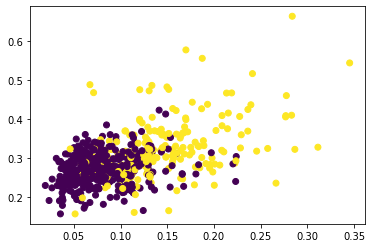

In [190]:
# Just try  for my exercise with 2-means
# Scatter plot certain column data
plt.scatter(points.compactness_mean, points.symmetry_worst, c = points.diagnosis)  ## compactness agains symmetry
plt.show()


In [0]:
# Check correlation  & find the min imum & max correlation
dd = dfnd.corr()

In [192]:
## try to check the least and biggest correlation between certain columns

# dd[abs(dd['radius_mean'])<0.1]['area_mean']   
dd[abs(dd['radius_mean'])>0.97]['area_mean']

radius_mean       0.987357
perimeter_mean    0.986507
area_mean         1.000000
Name: area_mean, dtype: float64

In [193]:
# Unsupervised: dfnd

dfd.shape

(569, 31)

In [223]:
# Find K-Means  with K=2
# Try to rrun multiple times & see the effect

kmeans = KMeans(n_clusters=2)
kmeans.fit(dfd)
print(kmeans.labels_)

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [0]:
dfd['clusters'] = kmeans.labels_
# dfd['clusters']

In [225]:
# include  "clusters" to df without "diagnosis"
dfnd = dfd
dfnd.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


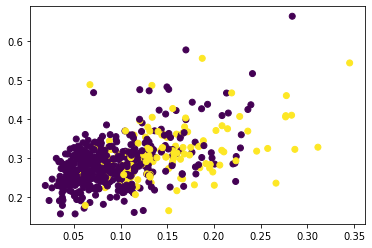

In [209]:
# Scatter plot with  color based on clusters.  Try the 1st trun

plt.scatter(dfnd['compactness_mean'], dfnd['symmetry_worst'], c=dfnd['clusters'])
plt.show()

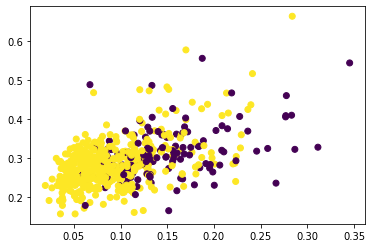

In [217]:
# Scatter plot with  color based on clusters.  Try the 4th trun

plt.scatter(dfnd['compactness_mean'], dfnd['symmetry_worst'], c=dfnd['clusters'])
plt.show()

In [0]:
# dfnd

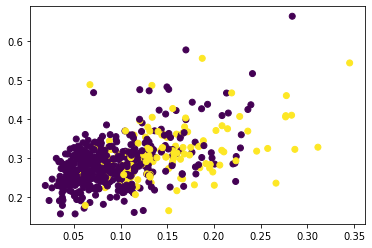

In [226]:
# Scatter plot with  color based on clusters.  Try the 10th trun,

plt.scatter(dfnd['compactness_mean'], dfnd['symmetry_worst'], c=dfnd['clusters'])
plt.show()

In [229]:
# Accuracy
# How many percent is clusters = True(diagnosis) after 10th run ?    >85%

print((dfnd['diagnosis']== dfnd['clusters']).value_counts())
print()
(dfnd['diagnosis']== dfnd['clusters']).value_counts()[1] / len(dfnd)

True     486
False     83
dtype: int64



0.8541300527240774

///**K-Means on our Pricipal Components**  use dfnd

In [230]:
# UNsupervised:  without column diagnosis

kmeans = KMeans(n_clusters=2)
kmeans.fit(dfnd)
print(kmeans.labels_)

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 

In [0]:
dfnd['clusters'] = kmeans.labels_

In [232]:
dfnd.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [0]:
# Prepare dataframe  df to have additional columns later on::  clusters & pca_clusters.  
df = dfnd


###Standardize data before PCA

In [241]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df) 

standardized_data

array([[ 1.29767572,  1.09706398, -2.07333501, ...,  1.93701461,
         1.82852713, -1.42925881],
       [ 1.29767572,  1.82982061, -0.35363241, ...,  0.28118999,
         1.82852713, -1.42925881],
       [ 1.29767572,  1.57988811,  0.45618695, ...,  0.20139121,
         1.82852713, -1.42925881],
       ...,
       [ 1.29767572,  0.70228425,  2.0455738 , ..., -0.31840916,
        -0.54688825, -1.42925881],
       [ 1.29767572,  1.83834103,  2.33645719, ...,  2.21963528,
         1.82852713, -1.42925881],
       [-0.77060855, -1.80840125,  1.22179204, ..., -0.75120669,
        -0.54688825,  0.69966334]])

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



###PCA

In [242]:
# Try different % PCA and see the #columns. The higher the accuracy, the more columns we get !!!

pca = PCA(.95)
pca_data = pca.fit_transform(standardized_data)

pca_data = pd.DataFrame(pca_data)

pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,9.430731,2.335679,-0.855676,-3.745831,-1.238879,1.389656,2.249886,0.027330,-0.377412,-0.015094,0.790082,0.427275
1,3.308596,-3.887612,-0.519886,-1.109547,0.502773,0.047073,-0.407639,1.307898,-1.016745,0.581503,-0.752572,-0.003876
2,6.327244,-0.944057,-0.462408,-0.957222,-0.204283,0.540507,-0.666111,0.014411,-0.012095,-0.042218,-0.477827,-0.565118
3,6.786586,10.668674,-3.298755,-0.120815,-2.954749,3.044389,1.339994,1.180667,-0.058203,-1.396137,1.248815,-1.127481
4,4.665545,-1.952919,1.468260,-2.861279,0.325053,-1.210758,-1.311395,1.028070,-0.173509,0.250535,-0.257223,0.356041


In [243]:
# Try different % PCA and see the #columns

pca = PCA(.9)      #  6 columns
pca_data = pca.fit_transform(standardized_data)

pca_data = pd.DataFrame(pca_data)

pca_data.head()

,0,1,2,3,4,5,6,7
0,9.430731,2.335679,-0.855676,-3.745831,-1.238879,1.389656,2.249886,0.027330
1,3.308596,-3.887612,-0.519886,-1.109547,0.502773,0.047073,-0.407639,1.307898
2,6.327244,-0.944057,-0.462408,-0.957222,-0.204283,0.540507,-0.666111,0.014411
3,6.786586,10.668674,-3.298755,-0.120815,-2.954749,3.044389,1.339994,1.180667
4,4.665545,-1.952919,1.468260,-2.861279,0.325053,-1.210758,-1.311395,1.028070


In [0]:
# Intermezzo....  to access a value or columns

# pca_data[2]
# pca_data.values[3,2]
# pca_data.values[0:1,2:3]

### K-MEANS

In [244]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_data)
print(kmeans.labels_)

df['pca_clusters'] = kmeans.labels_

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 0 

In [245]:
# Now  original dataframe (df has  column "clusters " & "pca_clusters")

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters,pca_clusters
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,0
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,0
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,0


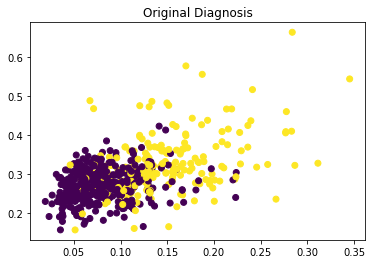

In [246]:
# Plot again

plt.scatter(df['compactness_mean'], df['symmetry_worst'], c=df['diagnosis'])
plt.title("Original Diagnosis")
plt.show();

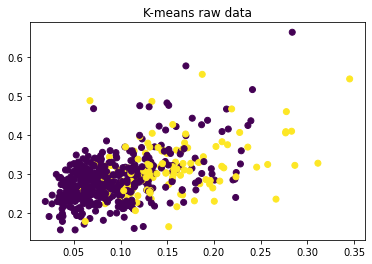

In [247]:
# K-means on Clusters

plt.scatter(df['compactness_mean'], df['symmetry_worst'], c=df['clusters'])
plt.title("K-means raw data")
plt.show()

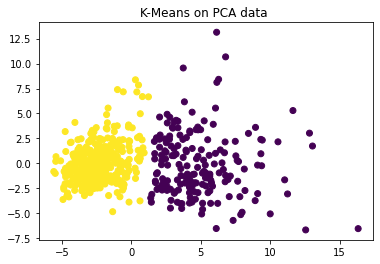

In [248]:
# KMeans on PCA data

plt.scatter(pca_data[0], pca_data[1], c=df['pca_clusters'])
plt.title("K-Means on PCA data ")
plt.show()

In [277]:
# Check accuracy of diagnosis against pca_clusters:  6.5%

print((df['diagnosis'] == df['pca_clusters']).value_counts())
print()
(df['diagnosis'] == df['pca_clusters']).value_counts()[1] / len(df)


False    532
True      37
dtype: int64



0.06502636203866433

In [273]:
df[df['diagnosis'] == df['pca_clusters']].head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters,pca_clusters
10,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.014600,0.003042,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452,0,1
13,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,0.4033,1.0780,2.903,36.58,0.009769,0.031260,0.05051,0.019920,0.029810,0.003002,16.84,27.66,112.00,876.5,0.11310,0.19240,0.23220,0.11190,0.2809,0.06287,0,1
16,1,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.011620,0.01998,0.011090,0.014100,0.002085,19.07,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216,0,1
38,1,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.1880,8.077,106.00,0.006883,0.010940,0.01818,0.019170,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0,1
39,1,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,0.2130,0.5914,1.545,18.52,0.005367,0.022390,0.03049,0.012620,0.013770,0.003187,15.53,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710,0,1


###**Now starts with Elbow method**

In [255]:
average_distance_from_points_to_centroids = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df)
  average_distance_from_points_to_centroids.append(kmeans.inertia_)

average_distance_from_points_to_centroids

[256677603.34963307,
 77943221.50287618,
 47336734.10963625,
 29226654.168291077,
 20539982.428219948,
 16562368.185702223,
 13267189.203639235,
 11180880.710128669,
 9447376.716406174,
 8502800.664476205]

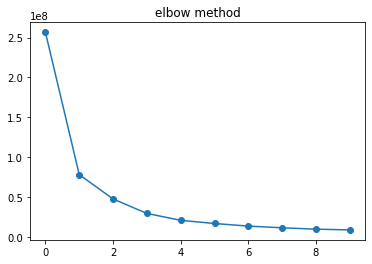

In [258]:
# The figure below shows the optimum K = 5

plt.plot(average_distance_from_points_to_centroids, marker='o')
plt.title('elbow method')
plt.style.use('ggplot')
plt.show()



## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
X = df
# X.shape

In [261]:
# standardize
df = df.copy()
scaler = StandardScaler()

#transform
Z = scaler.fit_transform(X)

# retain Principle Component 1 & 2
pca = PCA(2)

# fit the data
pca.fit(Z)

# transform  data
B = pca.transform(Z)
B

array([[ 9.43073053,  2.33567883],
       [ 3.30859606, -3.88761216],
       [ 6.32724377, -0.944057  ],
       ...,
       [ 1.71902122, -1.77066597],
       [10.56268384,  2.16211993],
       [-5.49734823, -0.9984587 ]])

In [262]:
# Standardized data, eigen vector & value

print("\n Standardized Data: \n", Z)
print("\n Eigenvalues: \n",pca.explained_variance_)
print("\n Transformed Data: \n", B)


 Standardized Data: 
 [[ 1.29767572  1.09706398 -2.07333501 ...  1.93701461  1.82852713
  -1.42925881]
 [ 1.29767572  1.82982061 -0.35363241 ...  0.28118999  1.82852713
  -1.42925881]
 [ 1.29767572  1.57988811  0.45618695 ...  0.20139121  1.82852713
  -1.42925881]
 ...
 [ 1.29767572  0.70228425  2.0455738  ... -0.31840916 -0.54688825
  -1.42925881]
 [ 1.29767572  1.83834103  2.33645719 ...  2.21963528  1.82852713
  -1.42925881]
 [-0.77060855 -1.80840125  1.22179204 ... -0.75120669 -0.54688825
   0.69966334]]

 Eigenvalues: 
 [15.25969682  5.89262392]

 Transformed Data: 
 [[ 9.43073053  2.33567883]
 [ 3.30859606 -3.88761216]
 [ 6.32724377 -0.944057  ]
 ...
 [ 1.71902122 -1.77066597]
 [10.56268384  2.16211993]
 [-5.49734823 -0.9984587 ]]


In [265]:
dg = pd.DataFrame(B)
dg.rename(columns={0:'pca1', 1: 'pca2'}, inplace=True)
dg.head()

,pca1,pca2
0,9.430731,2.335679
1,3.308596,-3.887612
2,6.327244,-0.944057
3,6.786586,10.668674
4,4.665545,-1.952919


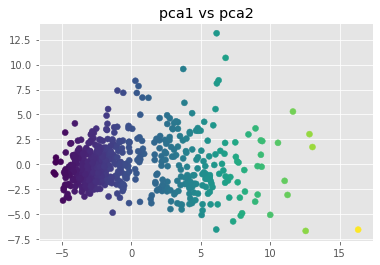

In [266]:
# Plotting pca1 & pca2

plt.title('pca1 vs pca2')

# plt.scatter(dg.pca1, dg.pca2, c=dg.pca1 );
plt.scatter(B[:,0], B[:,1], c =B[:,0]);

In [278]:
# Check accuracy as shown above:  6.5%

print((df['diagnosis'] == df['pca_clusters']).value_counts())
print()
(df['diagnosis'] == df['pca_clusters']).value_counts()[1] / len(df)


False    532
True      37
dtype: int64



0.06502636203866433

In [0]:
# Your Code Here

In [0]:
##### Your Code Here #####

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project